## Malaria Parasite Detection Using CNN

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2018/12/dl_medical_imaging_malaria_dataset.jpg)

Pada Dataset yang diberikan dari kaggle dari link iarunava/cell-images-for-detecting-malaria. lalu Setelah di lakukan eksplorasi ternyata ada file thumbs.db yang tidak di kenal di dataset Uninfected dan Parasitized. Selain itu ada duplicate direcory cell_image yang menyebabkan beberapa error sehingga dihapus. Setelah melakukan beberapa pembersihan, dataset tersebut diupload ke github daffeyd sehingga jika dilakukan run ulang tidak perlu ribet memasukan credentials dan pembersihan lagi.

In [1]:
#import library yang diperlukan untuk membuat plot
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.13.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

dataset yang telah didownload dari kaggle.com kemudian di-upload ke github dan disini akan di-clone kembali agar dapat diproses

In [3]:
!git clone https://github.com/daffeyd/MalariaDetection.git

Cloning into 'MalariaDetection'...
remote: Enumerating objects: 27579, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 27579 (delta 3), reused 4 (delta 1), pack-reused 27569
Receiving objects: 100% (27579/27579), 318.20 MiB | 27.12 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (27564/27564), done.


In [4]:
categories = ['parasitized', 'uninfected']
dir = 'MalariaDetection/cell_images'
data = tf.keras.utils.image_dataset_from_directory(dir)

Found 27558 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator() #untuk liat data spesifik dari dataset
batch = data_iterator.next() #untuk mengambil data selanjutnya dari dataset

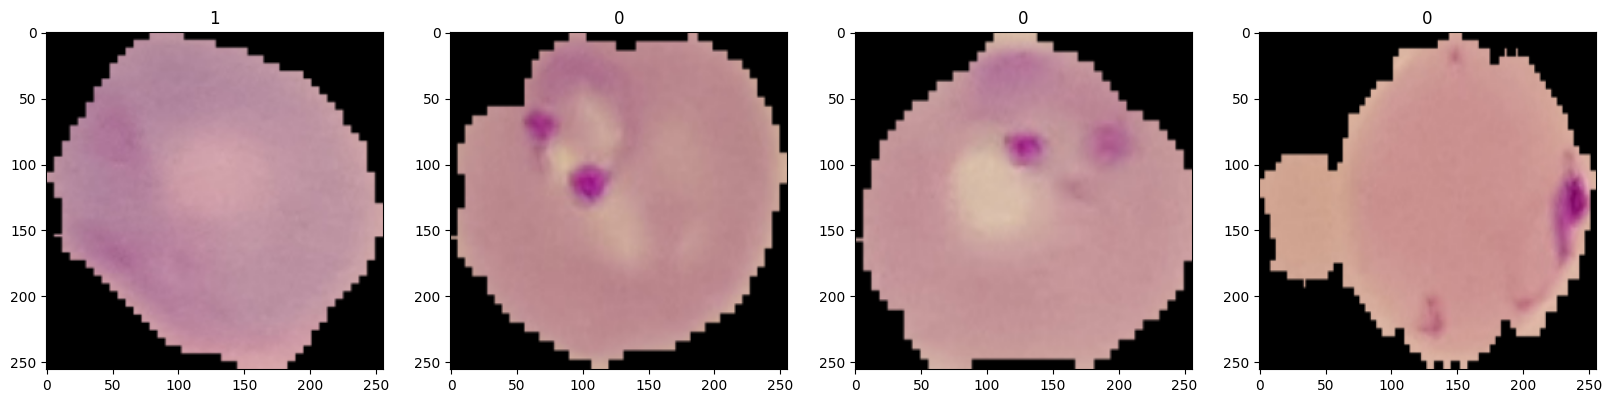

In [6]:
#menampilkan image
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#Scale Data

In [7]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

#Split Data

In [8]:
train_size = int(len(data)*.7) #train
val_size = int(len(data)*.2) #validation
test_size = int(len(data)*.1) #test

In [9]:
train_size #untuk liat seberapa besar size datanya

603

In [10]:
train = data.take(train_size) #ambil data masukkin ke train
val = data.skip(train_size).take(val_size) #skip data train, sisanya masukkin validation
test = data.skip(train_size+val_size).take(test_size) #skip data train & val, sisanya masukkin test

#Building Deep Data Model

In [11]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential() #bikin model

In [13]:
#model parameter
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [15]:
model.summary() #kesimpulan dari model diatas

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#Train

In [16]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
603/603 [==============================] - 71s 97ms/step - loss: 0.4230 - accuracy: 0.7904 - val_loss: 0.2017 - val_accuracy: 0.9301
Epoch 2/20
603/603 [==============================] - 74s 122ms/step - loss: 0.1933 - accuracy: 0.9371 - val_loss: 0.1877 - val_accuracy: 0.9402
Epoch 3/20
603/603 [==============================] - 70s 116ms/step - loss: 0.1589 - accuracy: 0.9487 - val_loss: 0.1707 - val_accuracy: 0.9451
Epoch 4/20
603/603 [==============================] - 70s 116ms/step - loss: 0.1270 - accuracy: 0.9574 - val_loss: 0.1700 - val_accuracy: 0.9431
Epoch 5/20
603/603 [==============================] - 72s 118ms/step - loss: 0.0964 - accuracy: 0.9669 - val_loss: 0.1698 - val_accuracy: 0.9484
Epoch 6/20
603/603 [==============================] - 56s 92ms/step - loss: 0.0724 - accuracy: 0.9752 - val_loss: 0.1916 - val_accuracy: 0.9455
Epoch 7/20
603/603 [==============================] - 73s 121ms/step - loss: 0.0550 - accuracy: 0.9819 - val_loss: 0.2052 - val_accu

#Plot Performance

buat plot dari training diatas


*   Loss
*   Accuracy



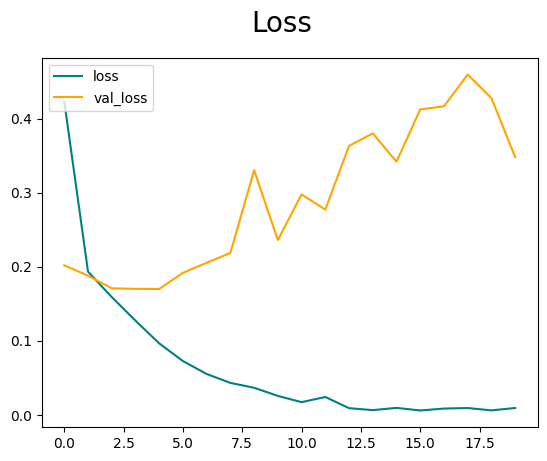

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

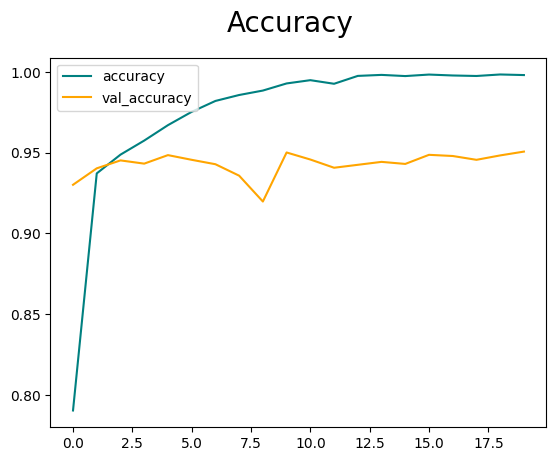

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#Evaluate


* disini untuk mengevaluasi data dan menampilkan performance metrics.
* memvisualisasikan hasil evaluasi machine learning

In [19]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [20]:
#performance metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [21]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 30ms/step


In [22]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9408759, shape=(), dtype=float32) tf.Tensor(0.9470977, shape=(), dtype=float32) tf.Tensor(0.94440407, shape=(), dtype=float32)


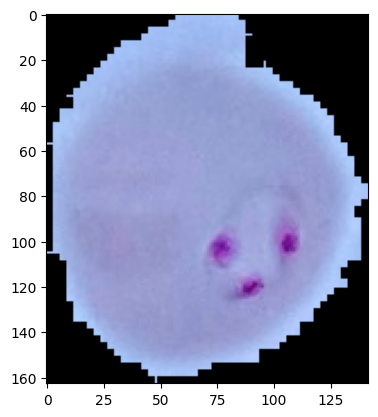

In [23]:
import cv2

img = cv2.imread('/content/MalariaDetection/testimage.png')
plt.imshow(img)
plt.show()

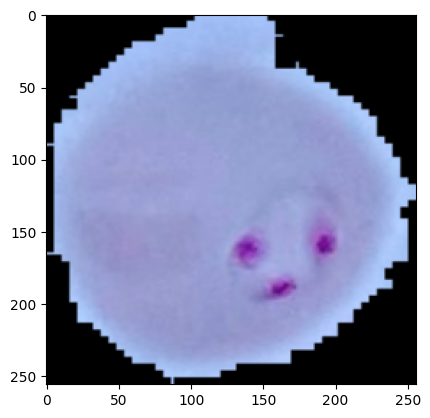

In [24]:
#ganti size gambar jadi kyk yg diinginkan
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [25]:
#reshape image yang telah didapat untuk predict si image masuk ke mana
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 195ms/step


In [26]:
yhat

array([[9.260849e-15]], dtype=float32)

In [27]:
if yhat < 0.5:
    print(f'me is infected')
else:
    print(f'me is healthy')

me is infected


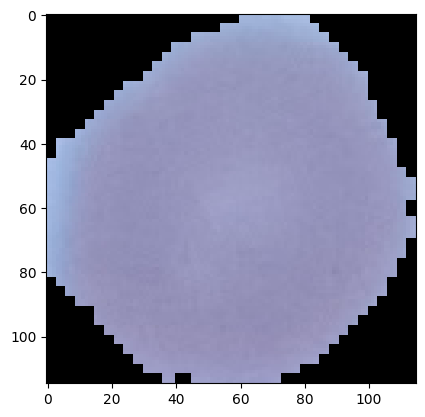

In [28]:
img = cv2.imread('/content/MalariaDetection/testimage2.png')
plt.imshow(img)
plt.show()

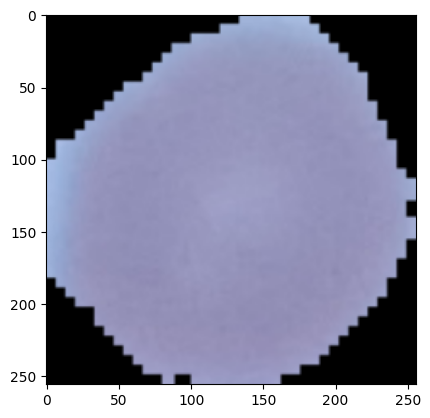

In [29]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [31]:
yhat

array([[0.99918884]], dtype=float32)

In [32]:
if yhat < 0.5:
    print(f'me is infected')
else:
    print(f'me is healthy')

me is healthy


#Save the model

In [33]:
from tensorflow.keras.models import load_model
import os

model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
new_model = load_model('models/imageclassifier.h5')


In [35]:
new_model.predict(np.expand_dims(resize/255, 0))
if yhat < 0.5:
    print(f'me is infected')
else:
    print(f'me is healthy')

1/1 [==============================] - 0s 80ms/step
me is healthy
